In [ ]:
import numpy as np 
import pandas as pd  
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

In [ ]:
review=pd.read_csv("Womens Clothing E-Commerce Reviews.csv",error_bad_lines=False,usecols=["Clothing ID","Age","Review Text"])
review.head(5)

In [ ]:
review.rename({"Review Text":"Review_Text"},axis=1,inplace=True)

In [ ]:
review["Review_Text"]=review["Review_Text"].astype(str)
book = [Review_Text.strip() for Review_Text in review.Review_Text] 
book = [Review_Text for Review_Text in review if Review_Text]

In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

In [ ]:
review

In [ ]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [27]:
review["emotion_values"]=review["Review_Text"].iloc[0:40].apply(calculate_sentiment)
review.iloc[0:40]

,Clothing ID,Age,Review_Text,emotion_values
0,767,33,Absolutely wonderful - silky and sexy and comf...,9.0
1,1080,34,Love this dress! it's sooo pretty. i happene...,10.0
2,1077,60,I had such high hopes for this dress and reall...,8.0
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",20.0
4,847,47,This shirt is very flattering to all due to th...,6.0
5,1080,49,"I love tracy reese dresses, but this one is no...",7.0
6,858,39,I aded this in my basket at hte last mintue to...,-1.0
7,858,39,"I ordered this in carbon for store pick up, an...",2.0
8,1077,24,I love this dress. i usually get an xs but it ...,3.0
9,1077,34,"I'm 5""5' and 125 lbs. i ordered the s petite t...",10.0


In [35]:
review['word_count'] = review["Review_Text"].iloc[0:40].str.split().apply(len)
review['word_count'].head(10)

0      8.0
1     62.0
2     98.0
3     22.0
4     36.0
5     98.0
6    101.0
7     97.0
8     34.0
9     72.0
Name: word_count, dtype: float64

In [38]:
review.head(5)

,Clothing ID,Age,Review_Text,emotion_values,word_count
0,767,33,Absolutely wonderful - silky and sexy and comf...,9.0,8.0
1,1080,34,Love this dress! it's sooo pretty. i happene...,10.0,62.0
2,1077,60,I had such high hopes for this dress and reall...,8.0,98.0
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",20.0,22.0
4,847,47,This shirt is very flattering to all due to th...,6.0,36.0


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


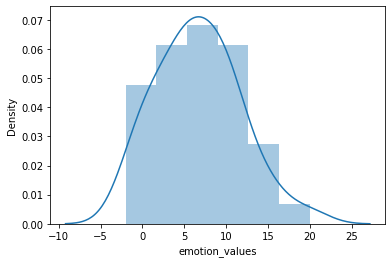

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(review["emotion_values"])

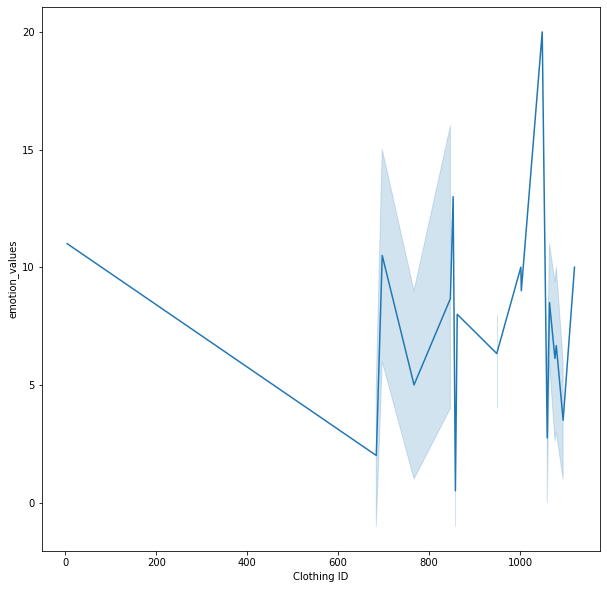

In [32]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Clothing ID",y="emotion_values",data=review.iloc[0:40])

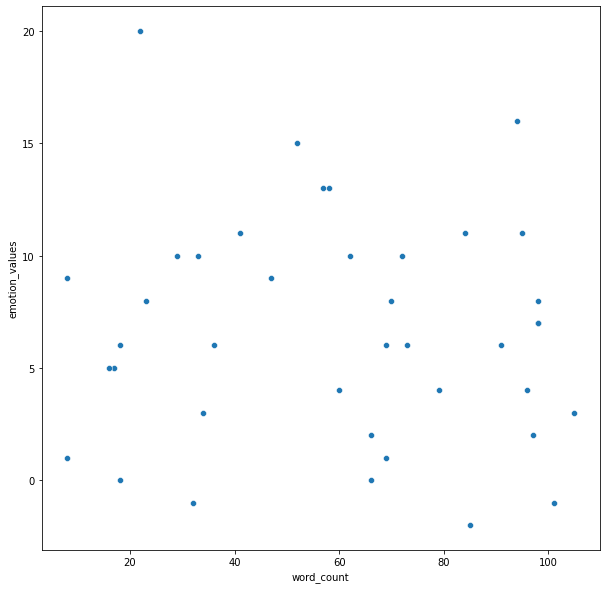

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="word_count",y="emotion_values",data=review.iloc[0:40])